# Feature Scaling

<hr>

- **Feature Scaling:** transforms values in the similiar range for machine learnig algorithm to behave optimal.

## Feature Scaling Techniques
- **Normalization:** is a special case of **MinMaxScaler**
    - Normalization converts values between `0 - 1`.
    
    $$\dfrac{values - values.min()}{values.max()} - values.min()$$
    - **MinMaxScaler:** Between any values.
    
    
- **Stardardization (StandarddScalar** from sklearn)
    - Mean: 0; StdDev: 1
    
    $$\dfrac{values - values.mean()}{values.std()}$$
    - Less sensitive to outliers

<hr>

## Machine Learning Algorithm
- Some algorithms are more sensitive than others
- **Distance-based** algorithms are most affected by the range of features.
    * Examples include: `SVM`, `KNN`, `K-means`

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data/weather.csv',index_col=0,parse_dates=True)
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-02-01,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,SSW,17.0,...,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,6.0,Yes
2008-02-02,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,E,9.0,...,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,6.6,Yes
2008-02-03,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,ESE,17.0,...,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,18.8,Yes
2008-02-04,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,E,22.0,...,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,77.4,Yes
2008-02-05,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,W,11.0,...,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,1.6,Yes


In [4]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,3334.000000,3335.000000,3331.000000,3286.000000,3321.000000,2301.000000,3311.000000,3312.000000,3323.000000,3324.000000,3317.000000,3318.000000,2771.000000,2776.000000,3333.000000,3333.000000,3337.000000
mean,14.865057,23.002339,3.330231,5.187432,7.179374,41.761408,15.070674,19.335447,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333,3.319868
std,4.553641,4.494638,9.895172,2.777407,3.810886,13.007523,7.079724,7.482554,15.085355,16.293530,7.021571,7.032211,2.749578,2.641885,4.897177,4.303737,9.885066
min,4.300000,11.700000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000,0.000000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,31.000000,9.000000,15.000000,58.000000,44.000000,1013.700000,1011.300000,1.000000,1.000000,13.800000,18.400000,0.000000
50%,14.900000,22.800000,0.000000,4.800000,8.300000,41.000000,15.000000,19.000000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000,0.000000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,50.000000,20.000000,24.000000,80.000000,65.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000,1.400000
max,27.600000,45.800000,119.400000,18.400000,13.600000,96.000000,54.000000,57.000000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000,119.400000


### Simplification
* Focus on numeric columns only
* Remove all missing values
* Explore Normalization and Standardization

In [5]:
from sklearn.model_selection import train_test_split
import numpy as np

In [6]:
data_clean = data.drop(['RISK_MM'],axis=1)
data_clean = data_clean.dropna()

In [7]:
len(data), len(data_clean)

(3337, 1690)

In [8]:
X = data_clean.select_dtypes(include='number')
y = data_clean['RainToday']

In [9]:
# transform the y

y = np.array([0 if value == 'No' else 1 for value in y])

In [10]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)
pd.DataFrame(X_train).describebe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000
mean,14.980399,23.429734,2.851775,5.414571,7.511612,41.677515,14.980030,19.761095,66.477071,52.886095,1018.535873,1016.135281,4.151627,4.093195,18.089053,21.879216
std,4.553343,4.453831,8.176845,2.839351,3.696782,12.521289,6.600499,7.246114,15.161828,15.902517,7.054959,7.048462,2.721996,2.589659,4.951512,4.219905
min,5.000000,11.700000,0.000000,0.000000,0.000000,19.000000,2.000000,2.000000,19.000000,10.000000,996.700000,994.000000,0.000000,0.000000,6.700000,11.000000
25%,11.200000,20.200000,0.000000,3.400000,5.100000,31.000000,11.000000,15.000000,57.000000,43.000000,1013.975000,1011.500000,1.000000,1.000000,14.200000,18.800000
50%,15.000000,23.200000,0.000000,5.000000,8.500000,41.000000,15.000000,20.000000,67.000000,54.000000,1018.600000,1016.300000,4.000000,4.000000,18.400000,21.600000
75%,18.900000,26.400000,1.000000,7.400000,10.300000,50.000000,19.000000,24.000000,78.000000,63.000000,1023.400000,1021.000000,7.000000,7.000000,21.900000,24.800000
max,27.100000,45.800000,94.400000,15.800000,13.600000,91.000000,44.000000,48.000000,100.000000,95.000000,1039.000000,1036.000000,8.000000,8.000000,36.500000,44.700000


<AxesSubplot:xlabel='Rainfall', ylabel='WindSpeed9am'>

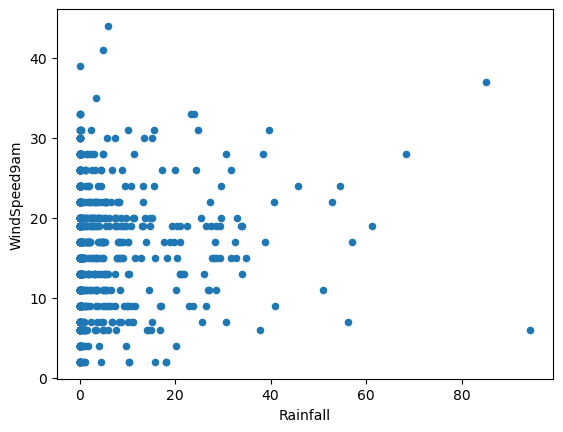

In [13]:
X_train.plot.scatter(x='Rainfall',y='WindSpeed9am')

### Box Plot

<AxesSubplot:>

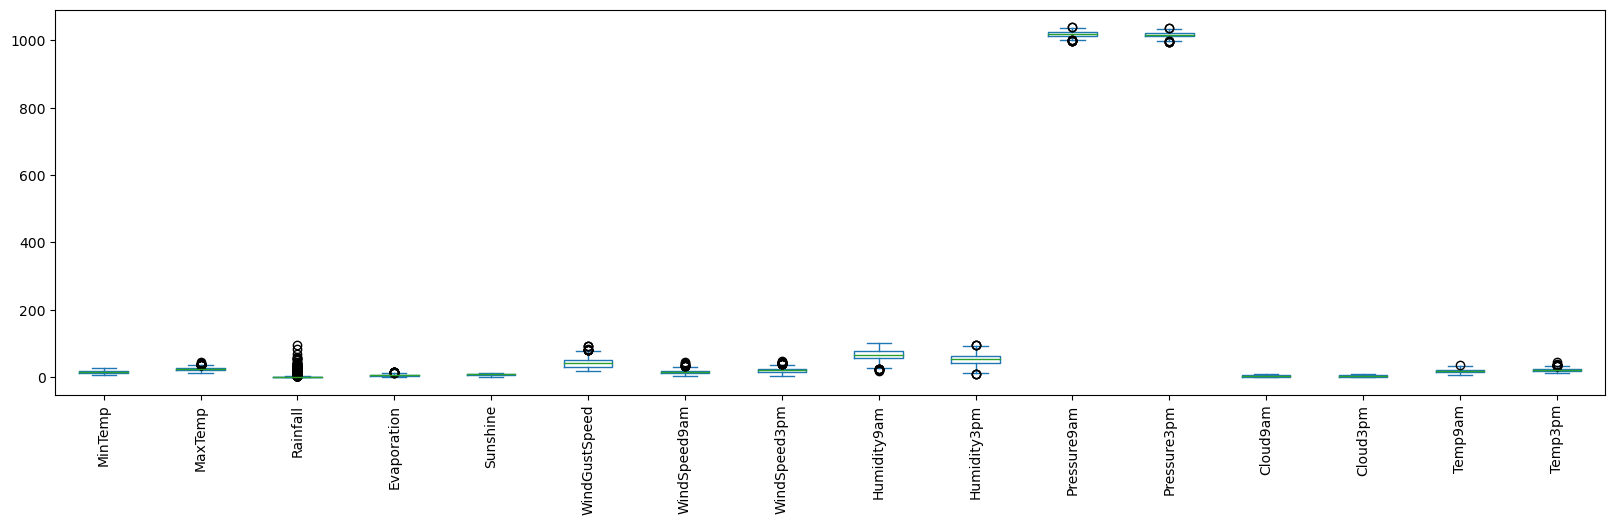

In [14]:
X_train.plot.box(figsize=(20,5),rot=90)

### Explore Normalization and Standardization

**Normalization**
* MinMaxScaler: transform features by scaling each feature to a given range
* `MinMaxScaler().fit(X_train)` is used to create a scaler.

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

In [17]:
pd.DataFrame(X_train_norm).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000
mean,0.451602,0.343980,0.030209,0.342694,0.552324,0.314965,0.309048,0.386111,0.586137,0.504542,0.516214,0.527031,0.518953,0.511649,0.382183,0.322825
std,0.206034,0.130611,0.086619,0.179706,0.271822,0.173907,0.157155,0.157524,0.187183,0.187088,0.166784,0.167821,0.340250,0.323707,0.166158,0.125220
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.280543,0.249267,0.000000,0.215190,0.375000,0.166667,0.214286,0.282609,0.469136,0.388235,0.408392,0.416667,0.125000,0.125000,0.251678,0.231454
50%,0.452489,0.337243,0.000000,0.316456,0.625000,0.305556,0.309524,0.391304,0.592593,0.517647,0.517730,0.530952,0.500000,0.500000,0.392617,0.314540
75%,0.628959,0.431085,0.010593,0.468354,0.757353,0.430556,0.404762,0.478261,0.728395,0.623529,0.631206,0.642857,0.875000,0.875000,0.510067,0.409496
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='2', ylabel='6'>

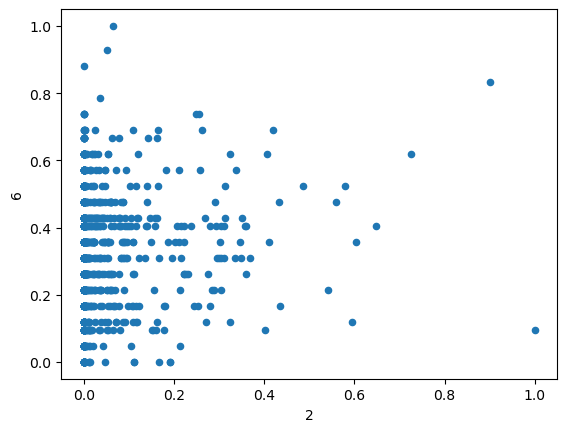

In [18]:
pd.DataFrame(X_train_norm).plot.scatter(x=2,y=6)

<AxesSubplot:>

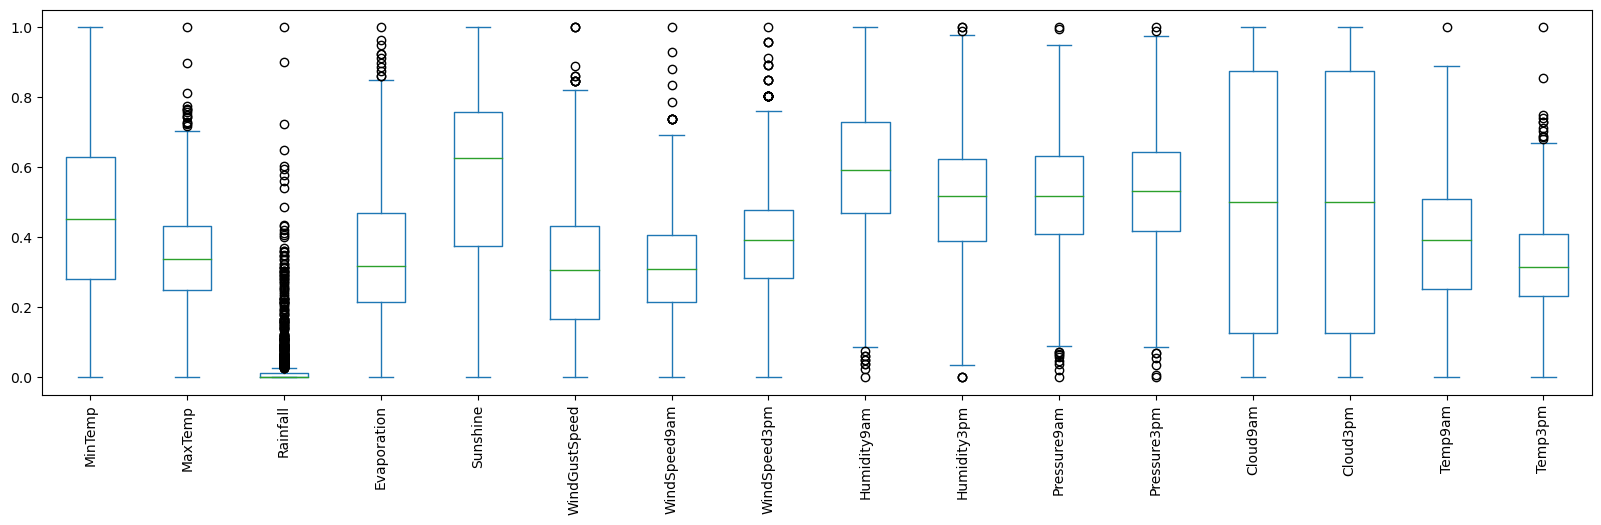

In [19]:
pd.DataFrame(X_train_norm,columns=X_train.columns).plot.box(figsize=(20,5),rot=90)

**Standardization**
* StandardScaler: transform features by scaling each feature to a given range
* `StandardScaler().fit(X_train)` is used to create a scaler.

In [20]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scale = StandardScaler().fit(X_train)

X_t